In [ ]:
"""
1D Magneto-optical trap (MOT) simulation. Est. March 2019
Preston Huft

"""

# notes and todo
no 

In [ ]:
# pseudocode here

atoms = ensemble(size) # generate atom dist with x,v,|c_i|^2
dt ~ lifetime
steps = 100

# first, some sanity checks
vstd = std(atoms.v)
xstd = std(atoms.x)

vavg = empty(len(steps),object)
xavg = empty(len(steps),object)

for a in atoms:
    
    vlist = empty(steps) 
    xlist = empty(steps)
    
    for i in range(steps):
        
        cg,ce,v,x = a.state # the current atom state

        tlist = linspace(0,dt,100) # dt ~ pi time
        solg,sole = master_eq(a.state,v,x) # the population dist
        plot(tlist,sol) # sanity check

        cg = accept_reject({tlist,solg},dt) # 1 or 0
        ce = 1-c_g

        x = v*dt
        k_eff = (omega+k*v)/c
        v = v-(hbar*k_eff/mRb)*c_e
        
        xlist[i]=x
        vlist[i]=v
        
        # update the atom state
        a.state = [cg,ce,v,x]
    
    # sanity checks
    plot(range(steps),xlist) 
    plot(range(steps),vlist)
    
    # update the lists to-be-averaged, el-wise addition
    xavg += xlist #
    vavg += vlist
    
# finish the averages
xavg /= len(atoms)
vavg /= len(atoms)

# plot temp 
temps = [(.5*mRb*v**2)/kB for v in vavg]
plot(range(steps),temps/1e-6)

In [26]:
## LIBRARIES 
import matplotlib.pyplot as plt
from math import e,pi
import numpy as np
from numpy import linspace,arange,sin,cos,exp
from random import random as rand
## LOCAL FILES
from physconsts import *
from rbconsts import *
from rb

In [299]:
## METHODS 
def state_init(n,showplot=False):
    # TODO add initial density matrix for the ensemble
    """intiliaze the ensemble of atoms. 
    n = number of atoms
    """
    state = np.empty((3,n)) # state[0]=x, state[1]=p
    
    # initial positions with gaussian dist
    state[0] = gaussian_rands(n,0,10,1000)
    
    # initial momenta with gaussian dist 
    state[1] = gaussian_rands(n,0,10,100)
    
    # initial energy states. for now, only two levels and no rules
    for i in range(0,n):
        state[2,i]= m.floor(rand()+.5) # state is 0 or 1
    
    if showplot is not False:
        state_plot(state)
    
    return state

def gaussian_rands(n,mean,sigma,domain,showplot=False):
    """return a 1D array of randoms with a gaussian pdf. 
       mean: the average value
       sigma: the std
       domain: the dist's domain. e.g. domain = 100 would
       generate a gaussian dist f(x) for x on (mean-domain/2,mean+domain/2)
    """
    var = sigma**2
    f0 = (1/m.sqrt(2*m.pi*var)) # the normalization const
    y_dist = np.empty(n) # the
    f_dist = np.empty(n) 
    x_dist = np.empty(n) # this is the distribution we want
    j = 0 # dist index
    while j < n:
        x = domain*(rand()-.5)+mean # rand val on domain of f(x)
        f = f0*m.exp(-(x-mean)**2/(2*var))
        y = rand()*f0 # rand val on range of f(x)
        if y <= f:
            y_dist[j]=y
            f_dist[j]=f
            x_dist[j]=x # x vals with approximate gaussian pdf
            j+=1
            
    # plot distribution as a check:
    if showplot is not False:
        plt.scatter(x_dist,y_dist,c='red',s=10)
        plt.scatter(x_dist,f_dist,c='blue',s=10)
        plt.show()
    
    return x_dist
    

def state_plot(state):
    #TODO:
    # set aspect ratio = 1 for the phase space plot,
    # draw a gaussian waist fit on the the p.s. plot
    # add this state plot function to the rb ensemble class
    """plot the ensemble in phase space and a level histogram"""
    x,p,e = state
    levels = [0,1] # the energy levels. not numpy because i'm lazy
    
    # phase space
    plt.subplot(221)
    plt.scatter(x,p,s=1)

    # level population
    plt.subplot(222)
    plt.hist(e,bins=2,histtype='step')
    plt.xticks(levels)

    plt.show()

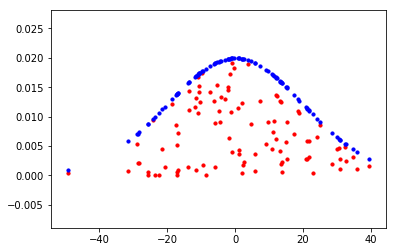

In [300]:
# test gaussian rands
n=gaussian_rands(100,0,20,100,True)

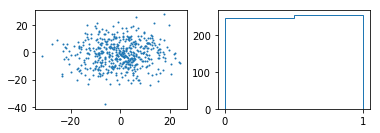

In [301]:
# test state generation and plot
atoms = state_init(500,True)

In [29]:
D2_MatElem

3.584e-29